First things first, let's import our dataset and check the type of variables

In [31]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [32]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [34]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As we can see, we have 201 missing values, so we use MICE algorithm to impute NaN values.

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()

data.iloc[:, [2,8,9]] = mice_imputer.fit_transform(data.iloc[:, [2,8,9]])
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.598921,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,32.484819,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [36]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [37]:
data = data.drop(columns=['id'])
data_copy = data.copy(deep = True)

data_copy["hypertension"] = np.where(data_copy["hypertension"] == 0, "No", "Yes")
data_copy["heart_disease"] = np.where(data_copy["heart_disease"] == 0, "No", "Yes")
data_copy["stroke"] = np.where(data_copy["stroke"] == 0, "No", "Yes")

In [38]:
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,32.598921,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


Let's check outliers in our dataset.

<AxesSubplot:xlabel='age'>

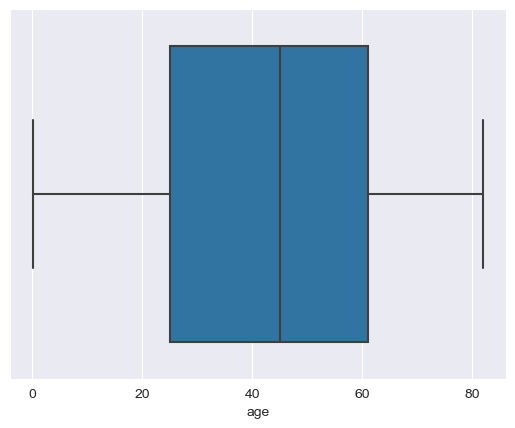

In [39]:
sns.boxplot(data_copy['age'])

<AxesSubplot:xlabel='avg_glucose_level'>

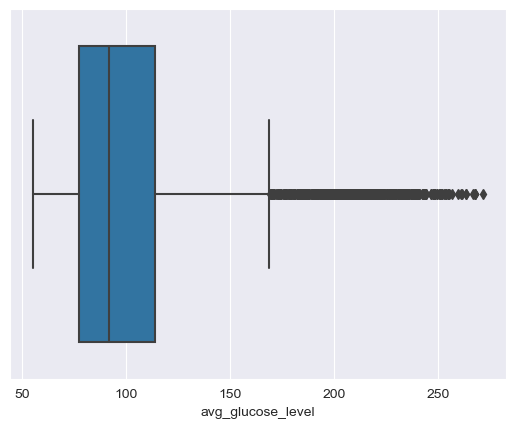

In [40]:
sns.boxplot(data_copy['avg_glucose_level'])

<AxesSubplot:xlabel='bmi'>

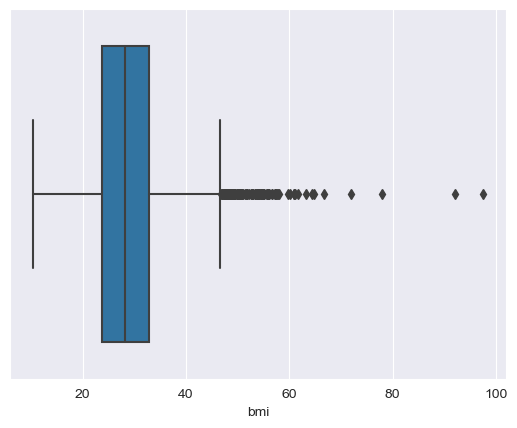

In [41]:
sns.boxplot(data_copy['bmi'])

We can see outliers in our dataset, so we use the Local Outlier Factor to identify and remove outliers in our dataset.

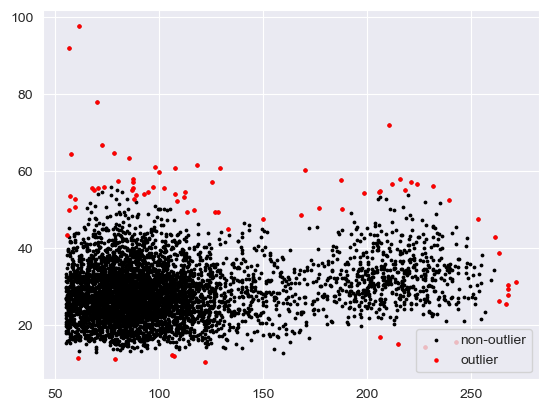

In [42]:
from sklearn.neighbors import LocalOutlierFactor

dc = data_copy.loc[:, ['avg_glucose_level','bmi']]
clf = LocalOutlierFactor(n_neighbors=60)
y_pred = clf.fit_predict(data_copy.loc[:, ['avg_glucose_level','bmi']])

plt.scatter(dc['avg_glucose_level'], dc['bmi'], color='k', s=3.0, label='non-outlier')
plt.scatter(dc[y_pred == -1]['avg_glucose_level'], dc[y_pred == -1]['bmi'], color='r', s=5.0, label='outlier')
plt.legend(loc='lower right')

plt.show()

data_copy.loc[:, ['avg_glucose_level','bmi']] = dc[y_pred == 1]

Now we can perform EDA

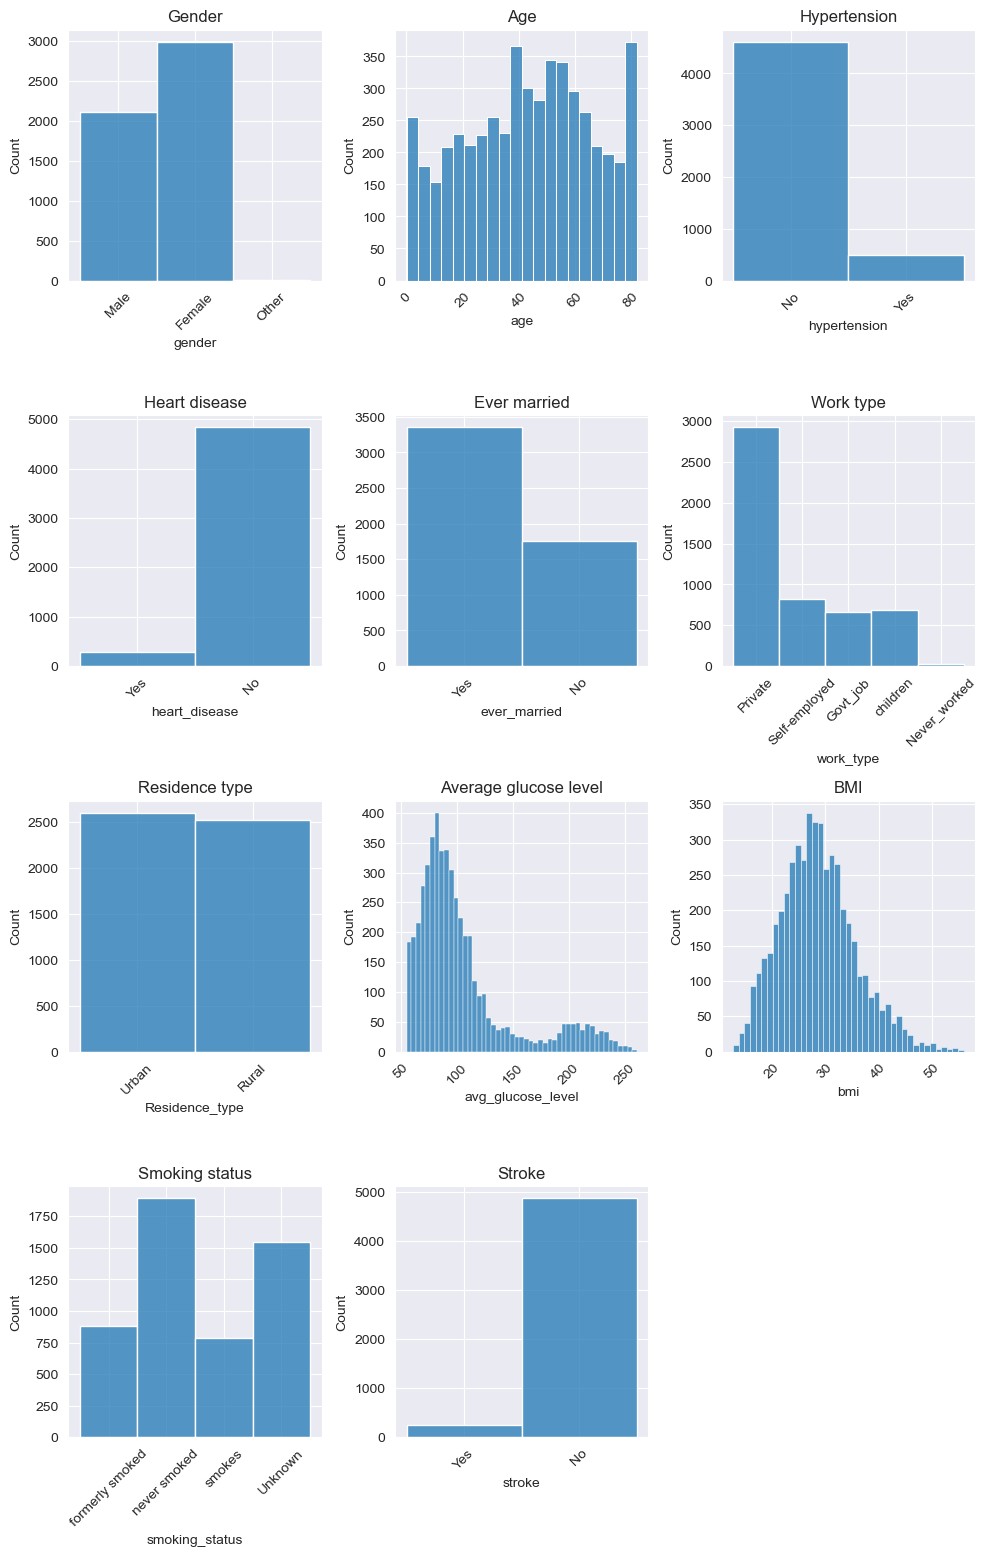

In [43]:
cols = list(data_copy.columns)
cols_data=cols[:]

labels= ['Gender', 'Age',
          'Hypertension',
          'Heart disease',
          'Ever married',
          'Work type',
          'Residence type',
          'Average glucose level',
          'BMI',
          'Smoking status',
          'Stroke']

plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(labels[i])
    plt.xticks(rotation=45)
    sns.histplot(data_copy[cols_data[i]])

plt.tight_layout()

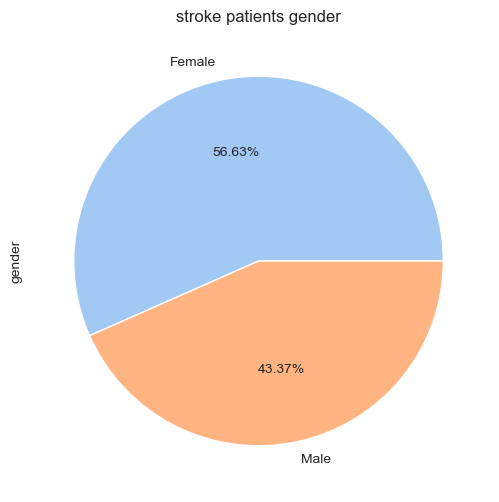

In [44]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['gender'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients gender')

plt.show()

We can see that the most of stroke patients are women, and there are 56.63 percent of all stroke cases

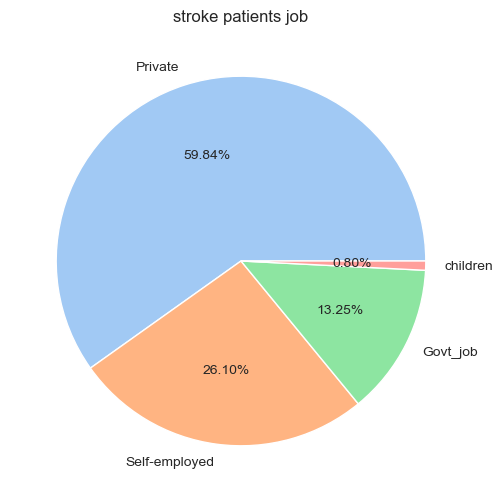

In [45]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['work_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients job')
plt.ylabel(None)

plt.show()

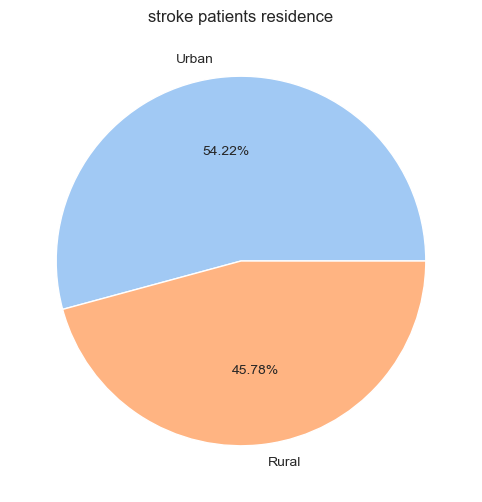

In [46]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['Residence_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients residence')
plt.ylabel(None)

plt.show()

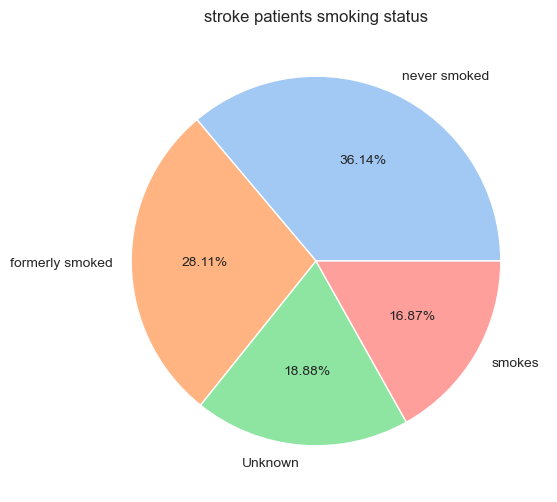

In [47]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['smoking_status'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients smoking status')
plt.ylabel(None)

plt.show()

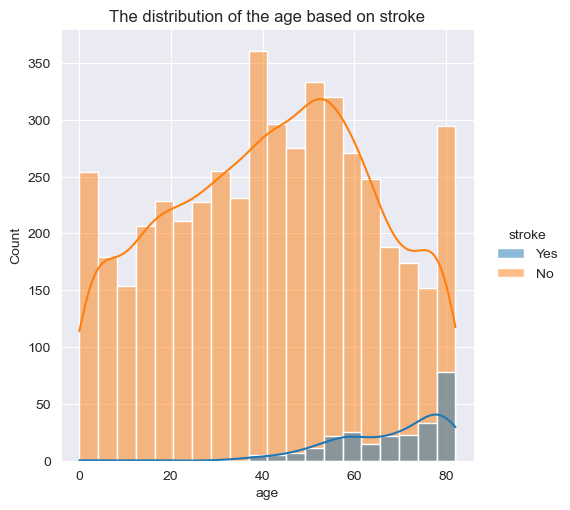

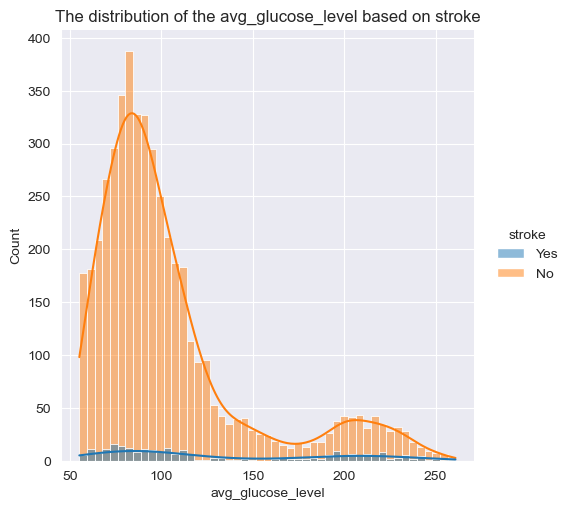

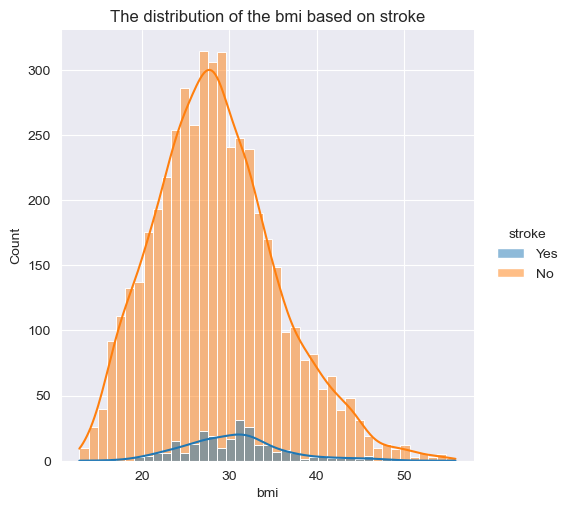

In [48]:
for i in data_copy.columns[:-1]:
    if data_copy[i].dtype == 'float64':
        sns.displot(data = data_copy, x = i, hue = 'stroke', kde = True)
        plt.title('The distribution of the {} based on stroke'.format(i))
        plt.show()

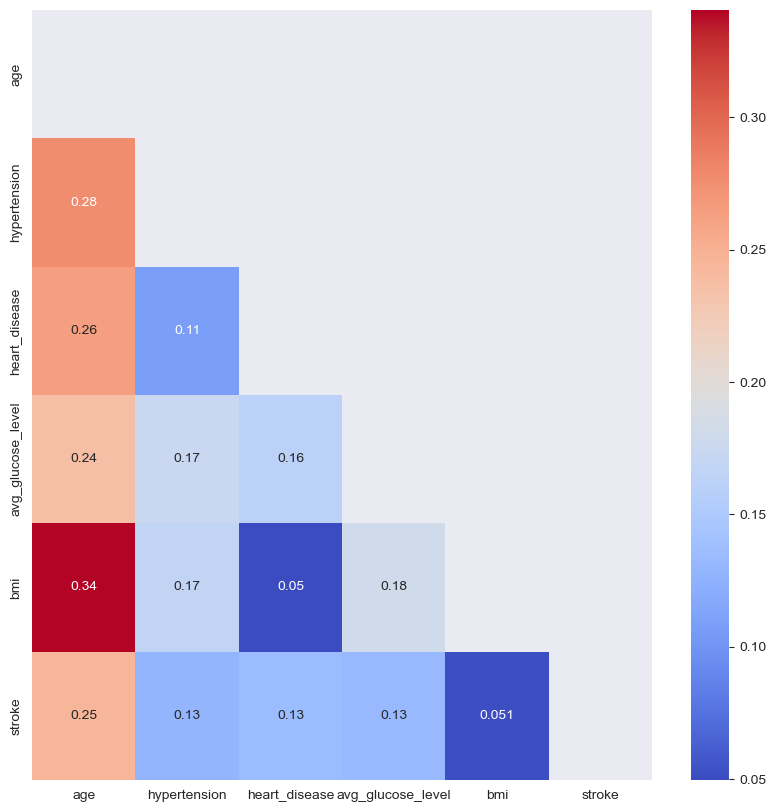

In [49]:
plt.figure(figsize=(10,10))
cor=data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot = True, cmap=plt.cm.coolwarm)
plt.show()

We can see that age is the most significant factor affecting the occurence of a stroke.

 ### Scikit-learn model


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import  SMOTE

In [51]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.598921,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [52]:
X_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
X_num = data.drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)

X_cat = pd.get_dummies(X_cat)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat], axis = 1)

y = data['stroke']

In [53]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

As we can see, we have imbalanced dataset so we use SMOTE to solve this problem.

In [54]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 444, stratify=y)

In [55]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (7777, 21)
Shape of X_test:  (1945, 21)
Shape of y_train:  (7777,)
Shape of y_test:  (1945,)


In [56]:
names = ['Logistic Regression', 'RandomForest Classifier', 'K-Nearest Neighbors Classifier', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Gaussian Naive Bayes','Bernoulli Naive Bayes', 'SVC']

models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),  AdaBoostClassifier(), DecisionTreeClassifier(), GaussianNB(), BernoulliNB(), SVC()]

results = pd.DataFrame(columns = ['accuracy score', 'recall score', 'precision score', 'f-1 score', 'ROC AUC score'], index = names)

accuracy=[]
recall=[]
precision=[]
specificity=[]
roc_auc=[]
f1=[]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_a = accuracy_score(y_test, y_pred)
    score_rec = recall_score(y_test, y_pred)
    score_p = precision_score(y_test, y_pred)
    score_s = specificity_score(y_test, y_pred)
    score_roc = roc_auc_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred)

    accuracy.append(score_a)
    recall.append(score_rec)
    precision.append(score_p)
    specificity.append(score_s)
    roc_auc.append(score_roc)
    f1.append(score_f1)

results['accuracy score'] = accuracy
results['recall score'] = recall
results['specificity score'] = specificity
results['precision score'] = precision
results['f-1 score'] = f1
results['ROC AUC score'] = roc_auc
results.sort_values(by = 'accuracy score', ascending = False)

,accuracy score,recall score,precision score,f-1 score,ROC AUC score,specificity score
RandomForest Classifier,0.954756,0.979445,0.933399,0.955868,0.954743,0.930041
K-Nearest Neighbors Classifier,0.913111,0.982528,0.862816,0.918789,0.913075,0.843621
Decision Tree Classifier,0.897686,0.911614,0.887000,0.899138,0.897679,0.883745
SVC,0.897172,0.909558,0.887663,0.898477,0.897166,0.884774
Logistic Regression,0.853470,0.832477,0.869099,0.850394,0.853481,0.874486
AdaBoost Classifier,0.832391,0.872559,0.807802,0.838933,0.832370,0.792181
Bernoulli Naive Bayes,0.718252,0.864337,0.669053,0.754260,0.718177,0.572016
Gaussian Naive Bayes,0.619023,0.998972,0.567757,0.724022,0.618828,0.238683


### RandomForest Classifier

As we can see, we should focus on RandomForestClassifier and perform hyperparameter tuning to achieve the best possible results.

In [78]:
rf = RandomForestClassifier()

In [79]:
n_estimators = [5,20,50,100,200,500]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [80]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=444, n_jobs = -1)

In [81]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100, 200,
                                                         500]},
                   random_state=444, verbose=2)

In [82]:
print('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}  



In [86]:
rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 30, bootstrap=False)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f'final model accuracy score: {round(accuracy_score(y_test, y_pred),3)}')
print(f'final model recall score: {round(recall_score(y_test, y_pred),3)}')
print(f'final model precision score: {round(precision_score(y_test, y_pred),3)}')
print(f'final model f-1 score: {round(f1_score(y_test, y_pred),3)}')
print(f'final model ROC AUC score: {round(roc_auc_score(y_test, y_pred),3)}')

final model accuracy score: 0.959
final model recall score: 0.978
final model precision score: 0.943
final model f-1 score: 0.96
final model ROC AUC score: 0.959


We can also make confusion matrix and ROC curve showing the quality of our classifier.

<AxesSubplot:>

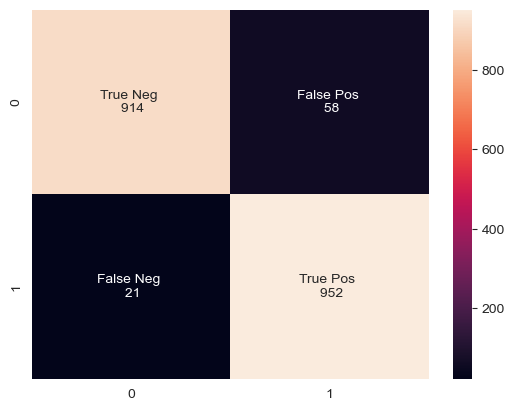

In [87]:
cm = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

labels = [f'{v1} \n {v2}' for v1, v2  in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

<Figure size 900x600 with 0 Axes>

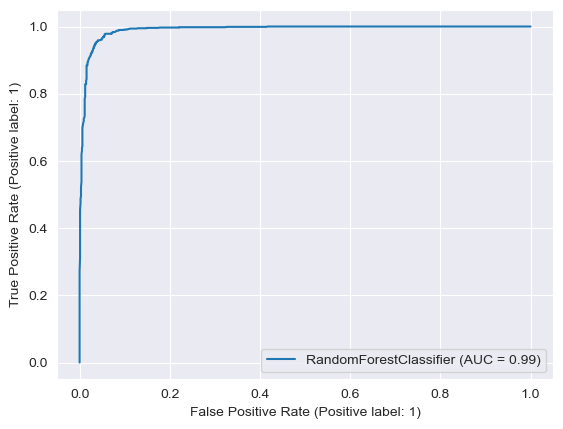

In [88]:
plt.figure(figsize = (9,6))
plot_roc_curve(rf, X_test, y_test)
plt.show()

We can also visualise feature importance.

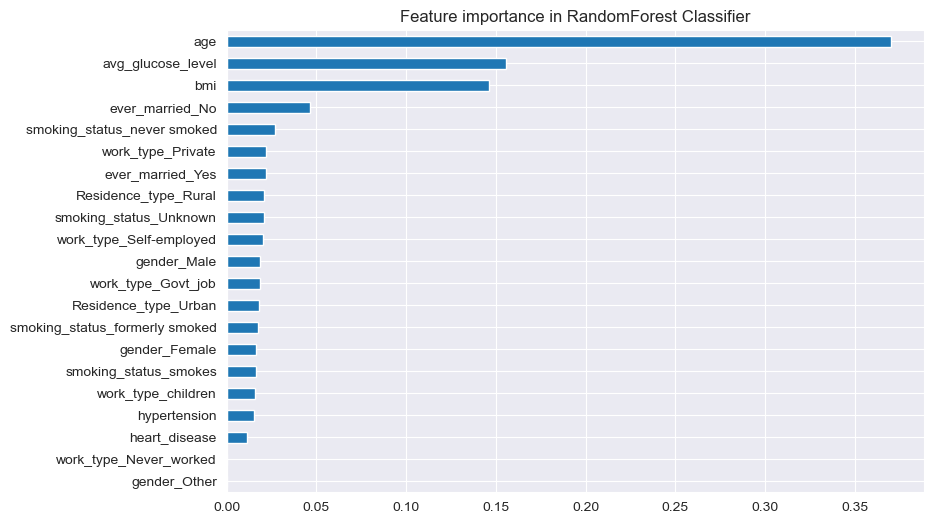

In [89]:
plt.figure(figsize = (9,6))

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sort = importances_rf.sort_values()
sort.plot(kind = 'barh')

plt.title('Feature importance in RandomForest Classifier')
plt.show()